In [1]:
# for recall df

%store -r w_df
%store -r w_test
%store -r w_train

## PACKAGES

In [2]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# for freqency analysis
from scipy import signal

# for ACF plot
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 2. Exploring the dataset with descriptive statistics and frequency analysis. Use appropriate graphs to visualise the data at hand

## EXPLORATORY ANALYSIS

In [3]:
# first we want to explore the characteristics of the variables 
w_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418 entries, 2009-01-04 to 2017-01-01
Freq: W-SUN
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         418 non-null    float64
 1   T (degC)         418 non-null    float64
 2   Tpot (K)         418 non-null    float64
 3   Tdew (degC)      418 non-null    float64
 4   rh (%)           418 non-null    float64
 5   VPmax (mbar)     418 non-null    float64
 6   VPact (mbar)     418 non-null    float64
 7   VPdef (mbar)     418 non-null    float64
 8   sh (g/kg)        418 non-null    float64
 9   H2OC (mmol/mol)  418 non-null    float64
 10  rho (g/m**3)     418 non-null    float64
 11  wv (m/s)         418 non-null    float64
 12  max. wv (m/s)    418 non-null    float64
 13  wd (deg)         418 non-null    float64
dtypes: float64(14)
memory usage: 49.0 KB


In [4]:
# in order to see the different scale of the variables and the principals statistics  
w_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
p (mbar),418.0,989.24,6.22,967.82,985.89,989.29,992.87,1007.89
T (degC),418.0,9.43,7.43,-12.64,3.71,9.48,15.30,24.77
Tpot (K),418.0,283.47,7.45,259.94,278.00,283.65,289.38,298.44
Tdew (degC),418.0,4.94,6.14,-15.44,0.53,5.37,10.11,16.75
rh (%),418.0,76.05,8.98,54.13,69.60,76.30,83.07,95.17
VPmax (mbar),418.0,13.56,6.40,2.42,8.12,12.37,17.96,33.09
VPact (mbar),418.0,9.53,3.77,1.91,6.44,9.07,12.53,19.14
VPdef (mbar),418.0,4.03,3.03,0.20,1.54,3.24,5.95,16.54
sh (g/kg),418.0,6.02,2.39,1.18,4.04,5.70,7.91,12.16
H2OC (mmol/mol),418.0,9.63,3.81,1.90,6.48,9.14,12.66,19.40


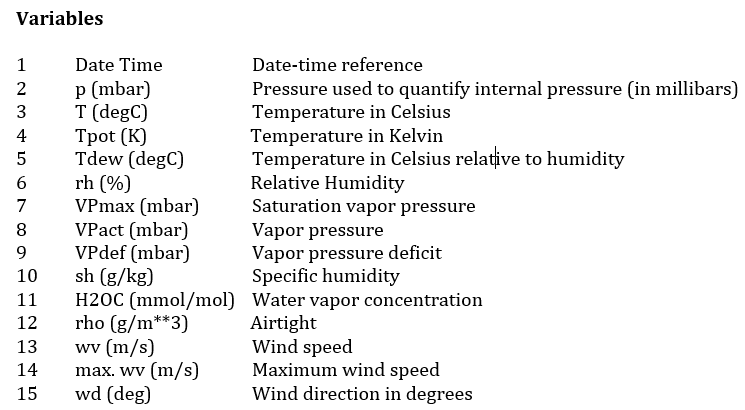

**General information** about our variable of interest **(T deg C) Temperature in Celsius**

* **Mean** T deg C: 9.43

* **Max** T deg C: 24.77

* **Min** T deg C: -12.62

We can also notice that we have **some other varibles** that could have visible outliers, like:

* **wv (m/s) - Wind speed**: -176.61
* **max. wv (m/s) - Maximum wind speed**: -194.96

Is something that we have to check and manage later.

# PLOTs

### 1) Line plot

for analyse Trend, Cycle and Seasonality

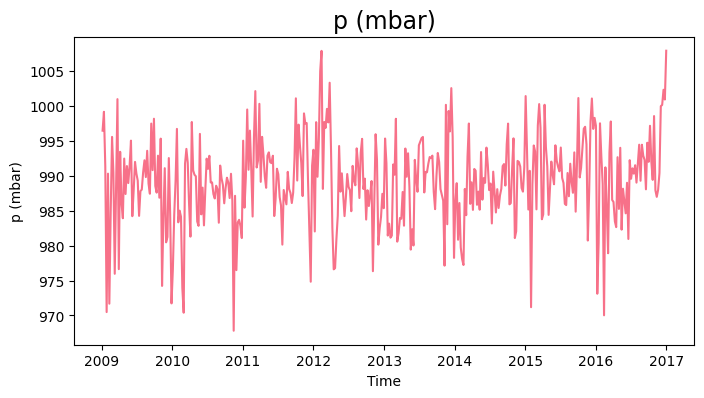

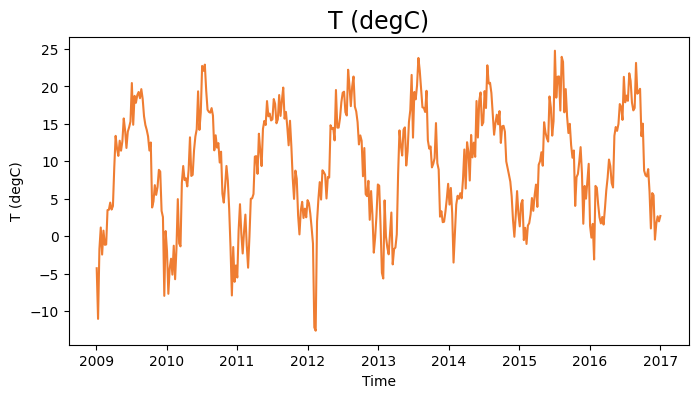

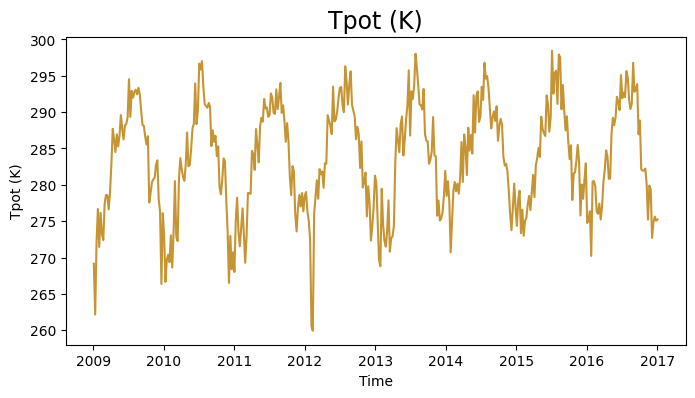

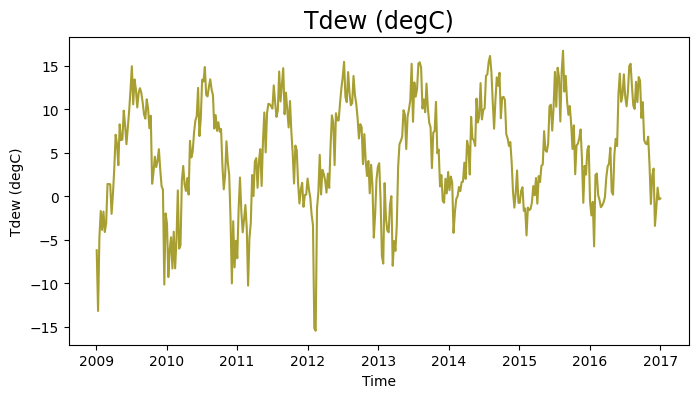

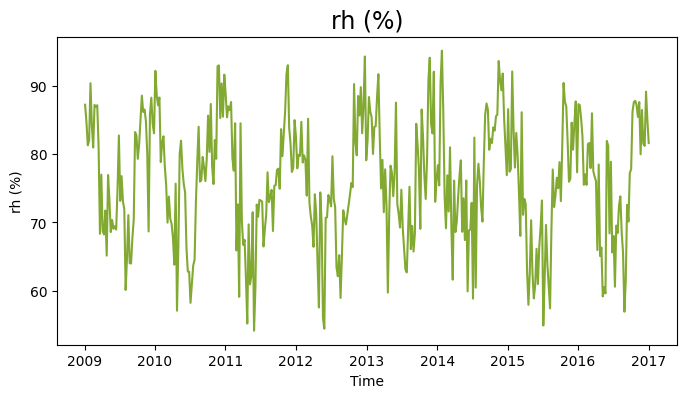

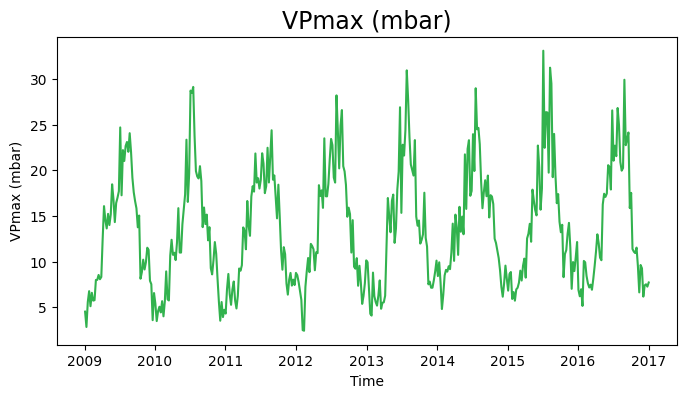

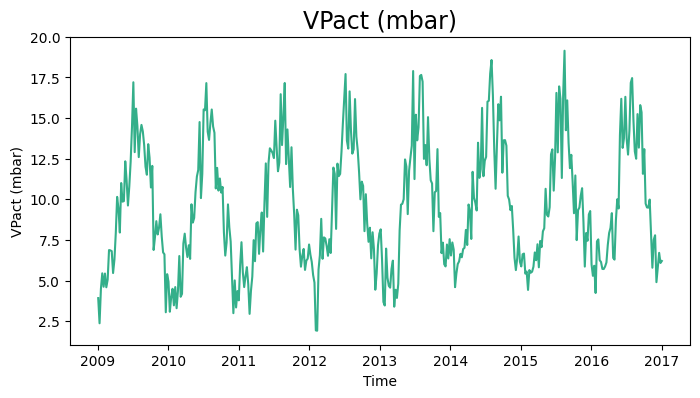

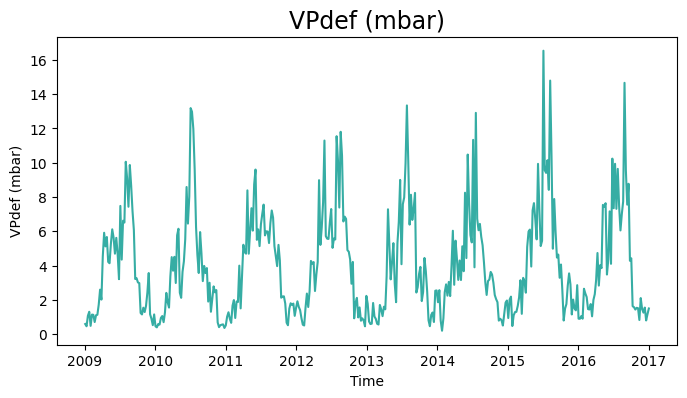

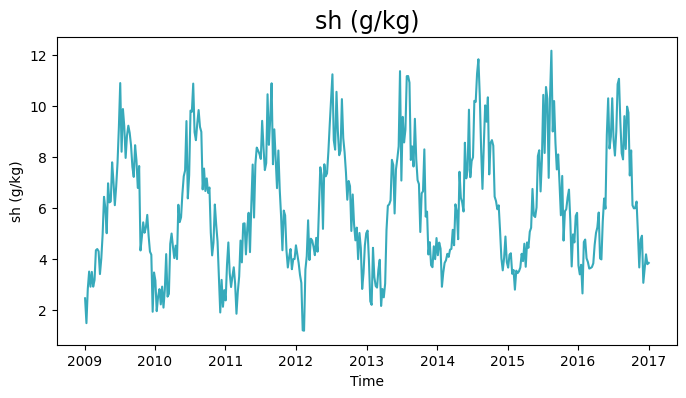

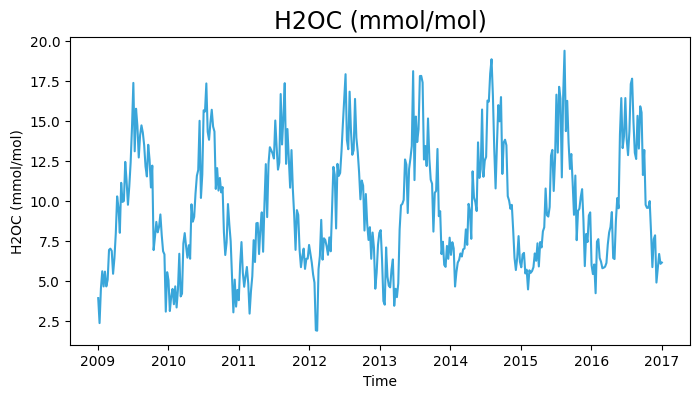

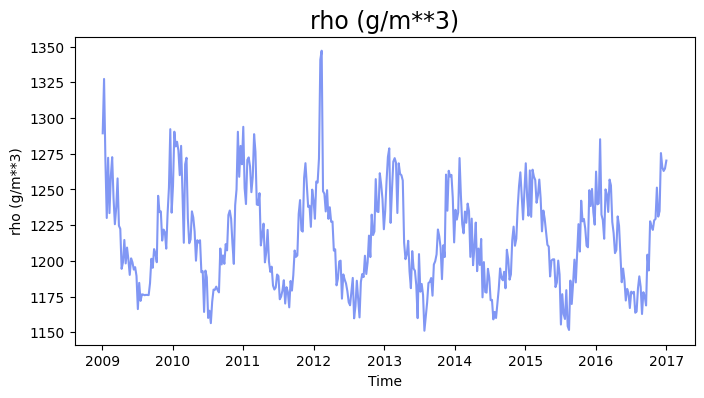

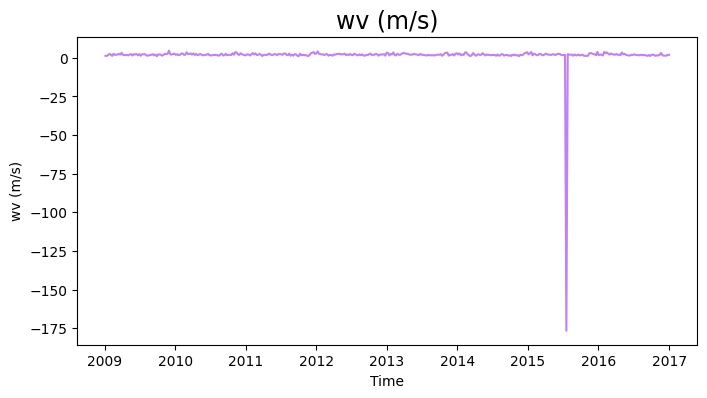

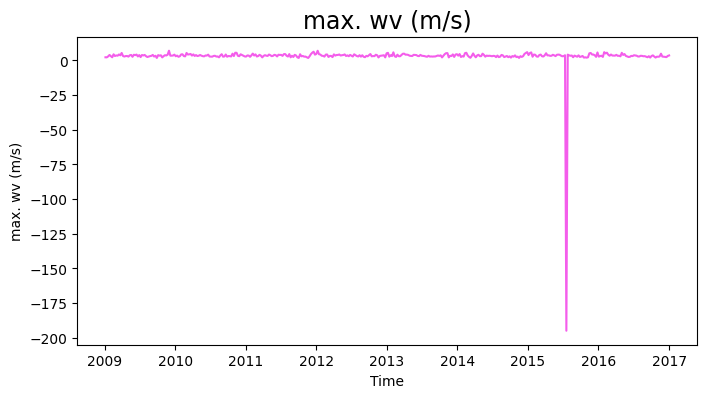

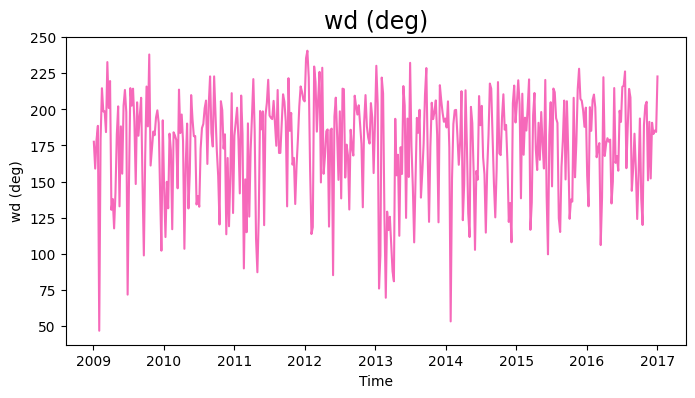

In [5]:
# Definition of the color palette for each variables
pal = sns.color_palette("husl", n_colors=len(w_df.columns))

# Loop for the column 
for i, column in enumerate(w_df.columns):
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=w_df, x=w_df.index, y=column, color=pal[i]) 
    plt.title(f"{column}", fontsize=17)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.show()


From this we can notice that we have a strong seasonal component from variable 2 to variable 6, will have to take in consideration later for the models.

Also, the seasonal could hide the other patterns, we have to verify later.

### 2) Histogrm 

For analyse the distribution of the variables

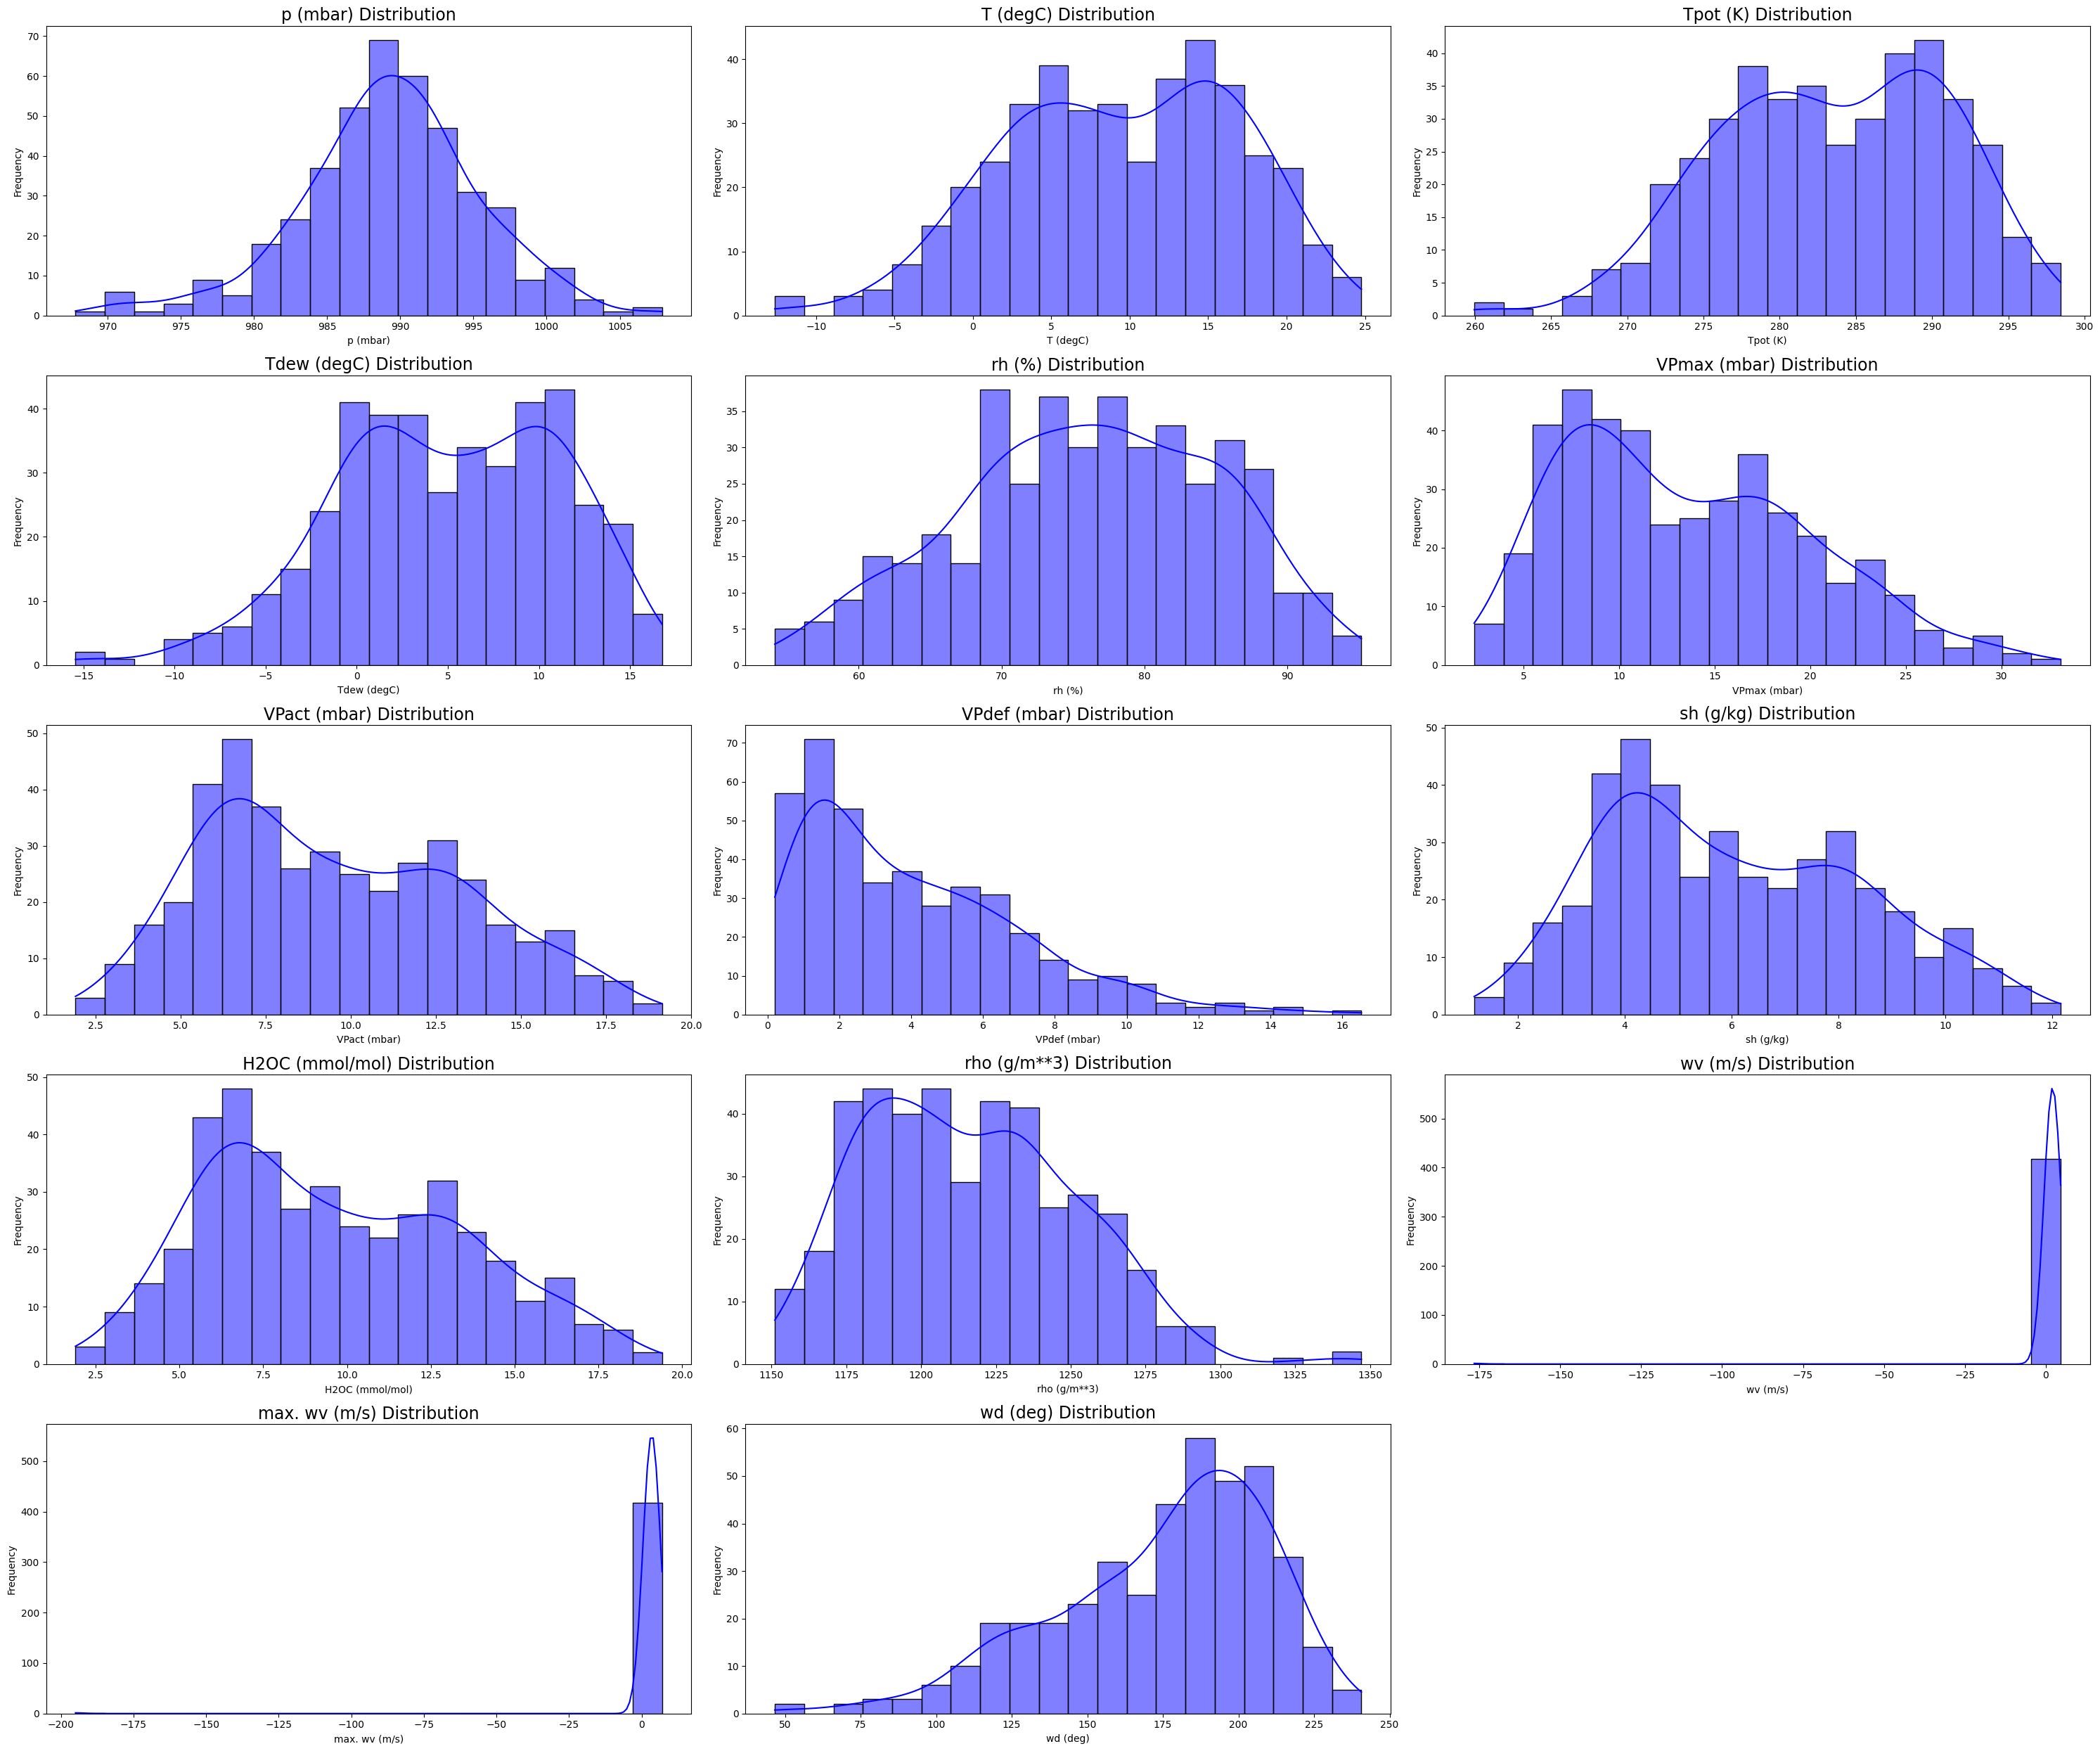

In [6]:
# first we extract the features and the len 
variables = w_df.columns  
n_vars = len(variables)  

# for having a better graphic rappresentation 
# definition of the number of cols and rows
n_cols = 3  
n_rows = (n_vars + n_cols - 1) // n_cols  

# Creation of the subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 5 * n_rows))
axes = axes.flatten()  

for i, var in enumerate(variables):
    sns.histplot(w_df[var], bins=20, kde=True, ax=axes[i],color='Blue')
    axes[i].set_title(f'{var} Distribution', fontsize=17)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# For delate empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 3) Violin plot + BoxPlot

For visualizing distribution + outlier

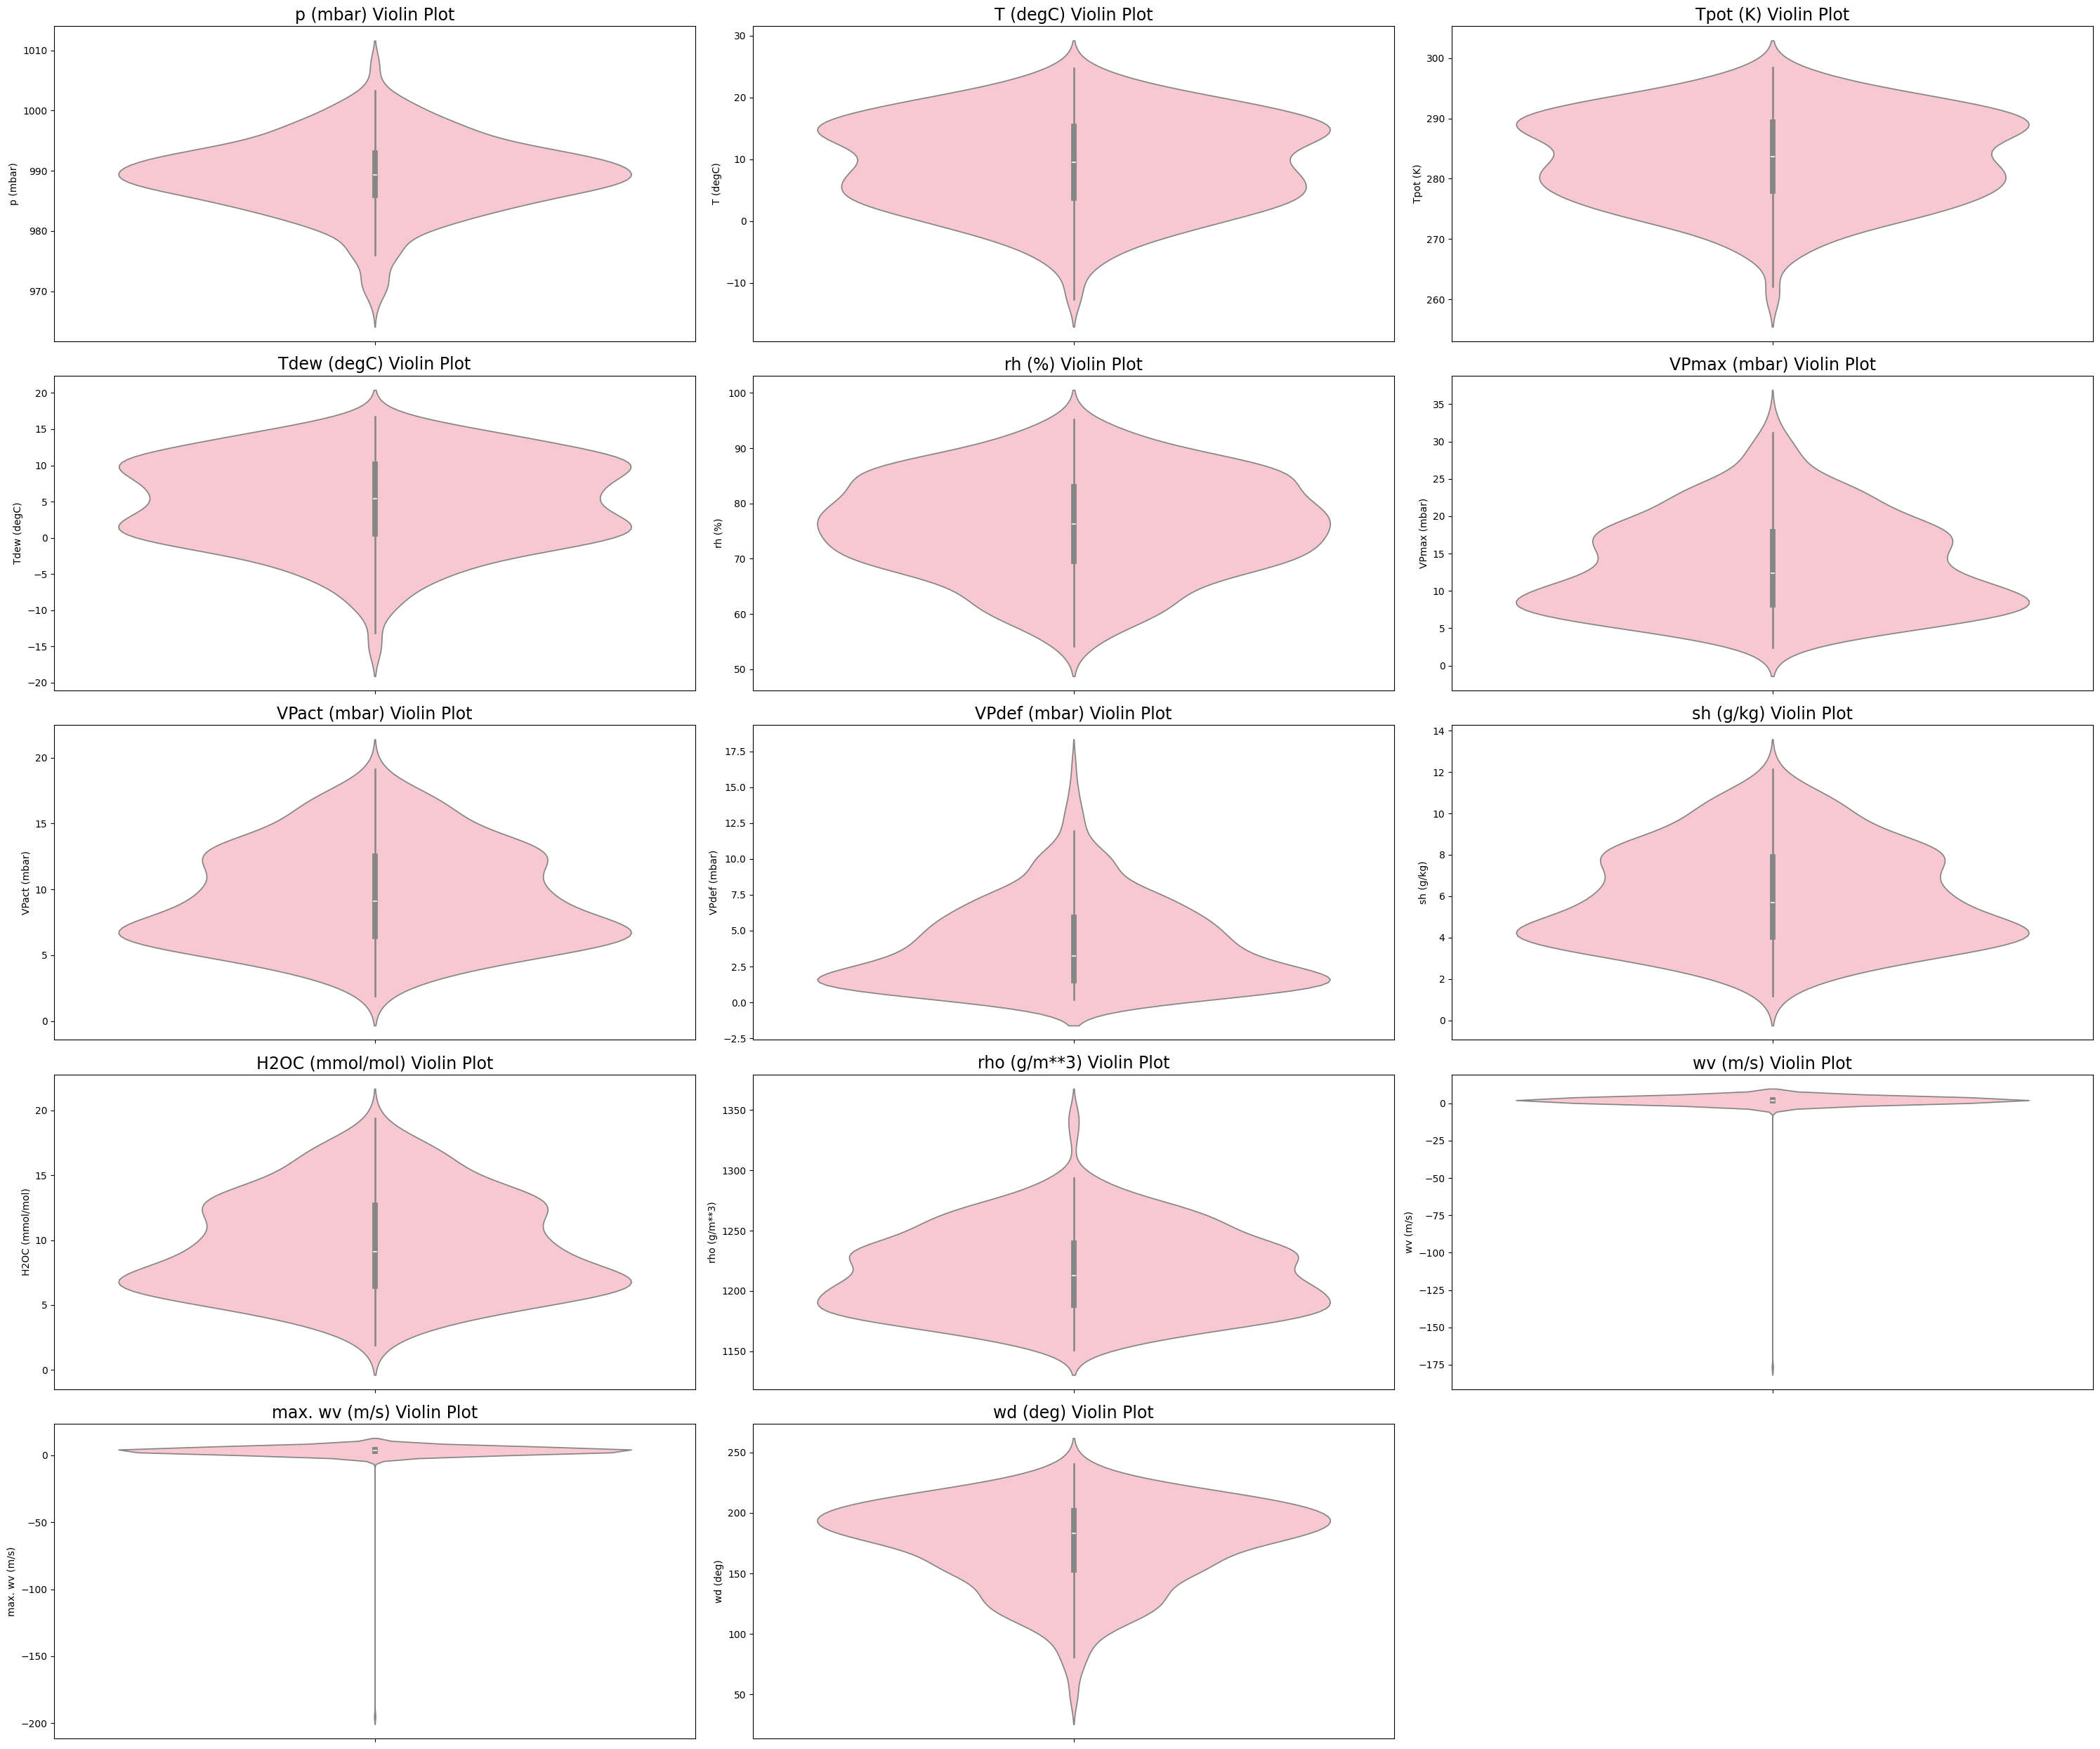

In [7]:
variables = w_df.columns  
n_vars = len(variables)  

n_cols = 3  
n_rows = (n_vars + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 5 * n_rows))
axes = axes.flatten()  

for i, var in enumerate(variables):
    sns.violinplot(y=w_df[var], ax=axes[i],color='Pink')
    axes[i].set_title(f'{var} Violin Plot', fontsize=17)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


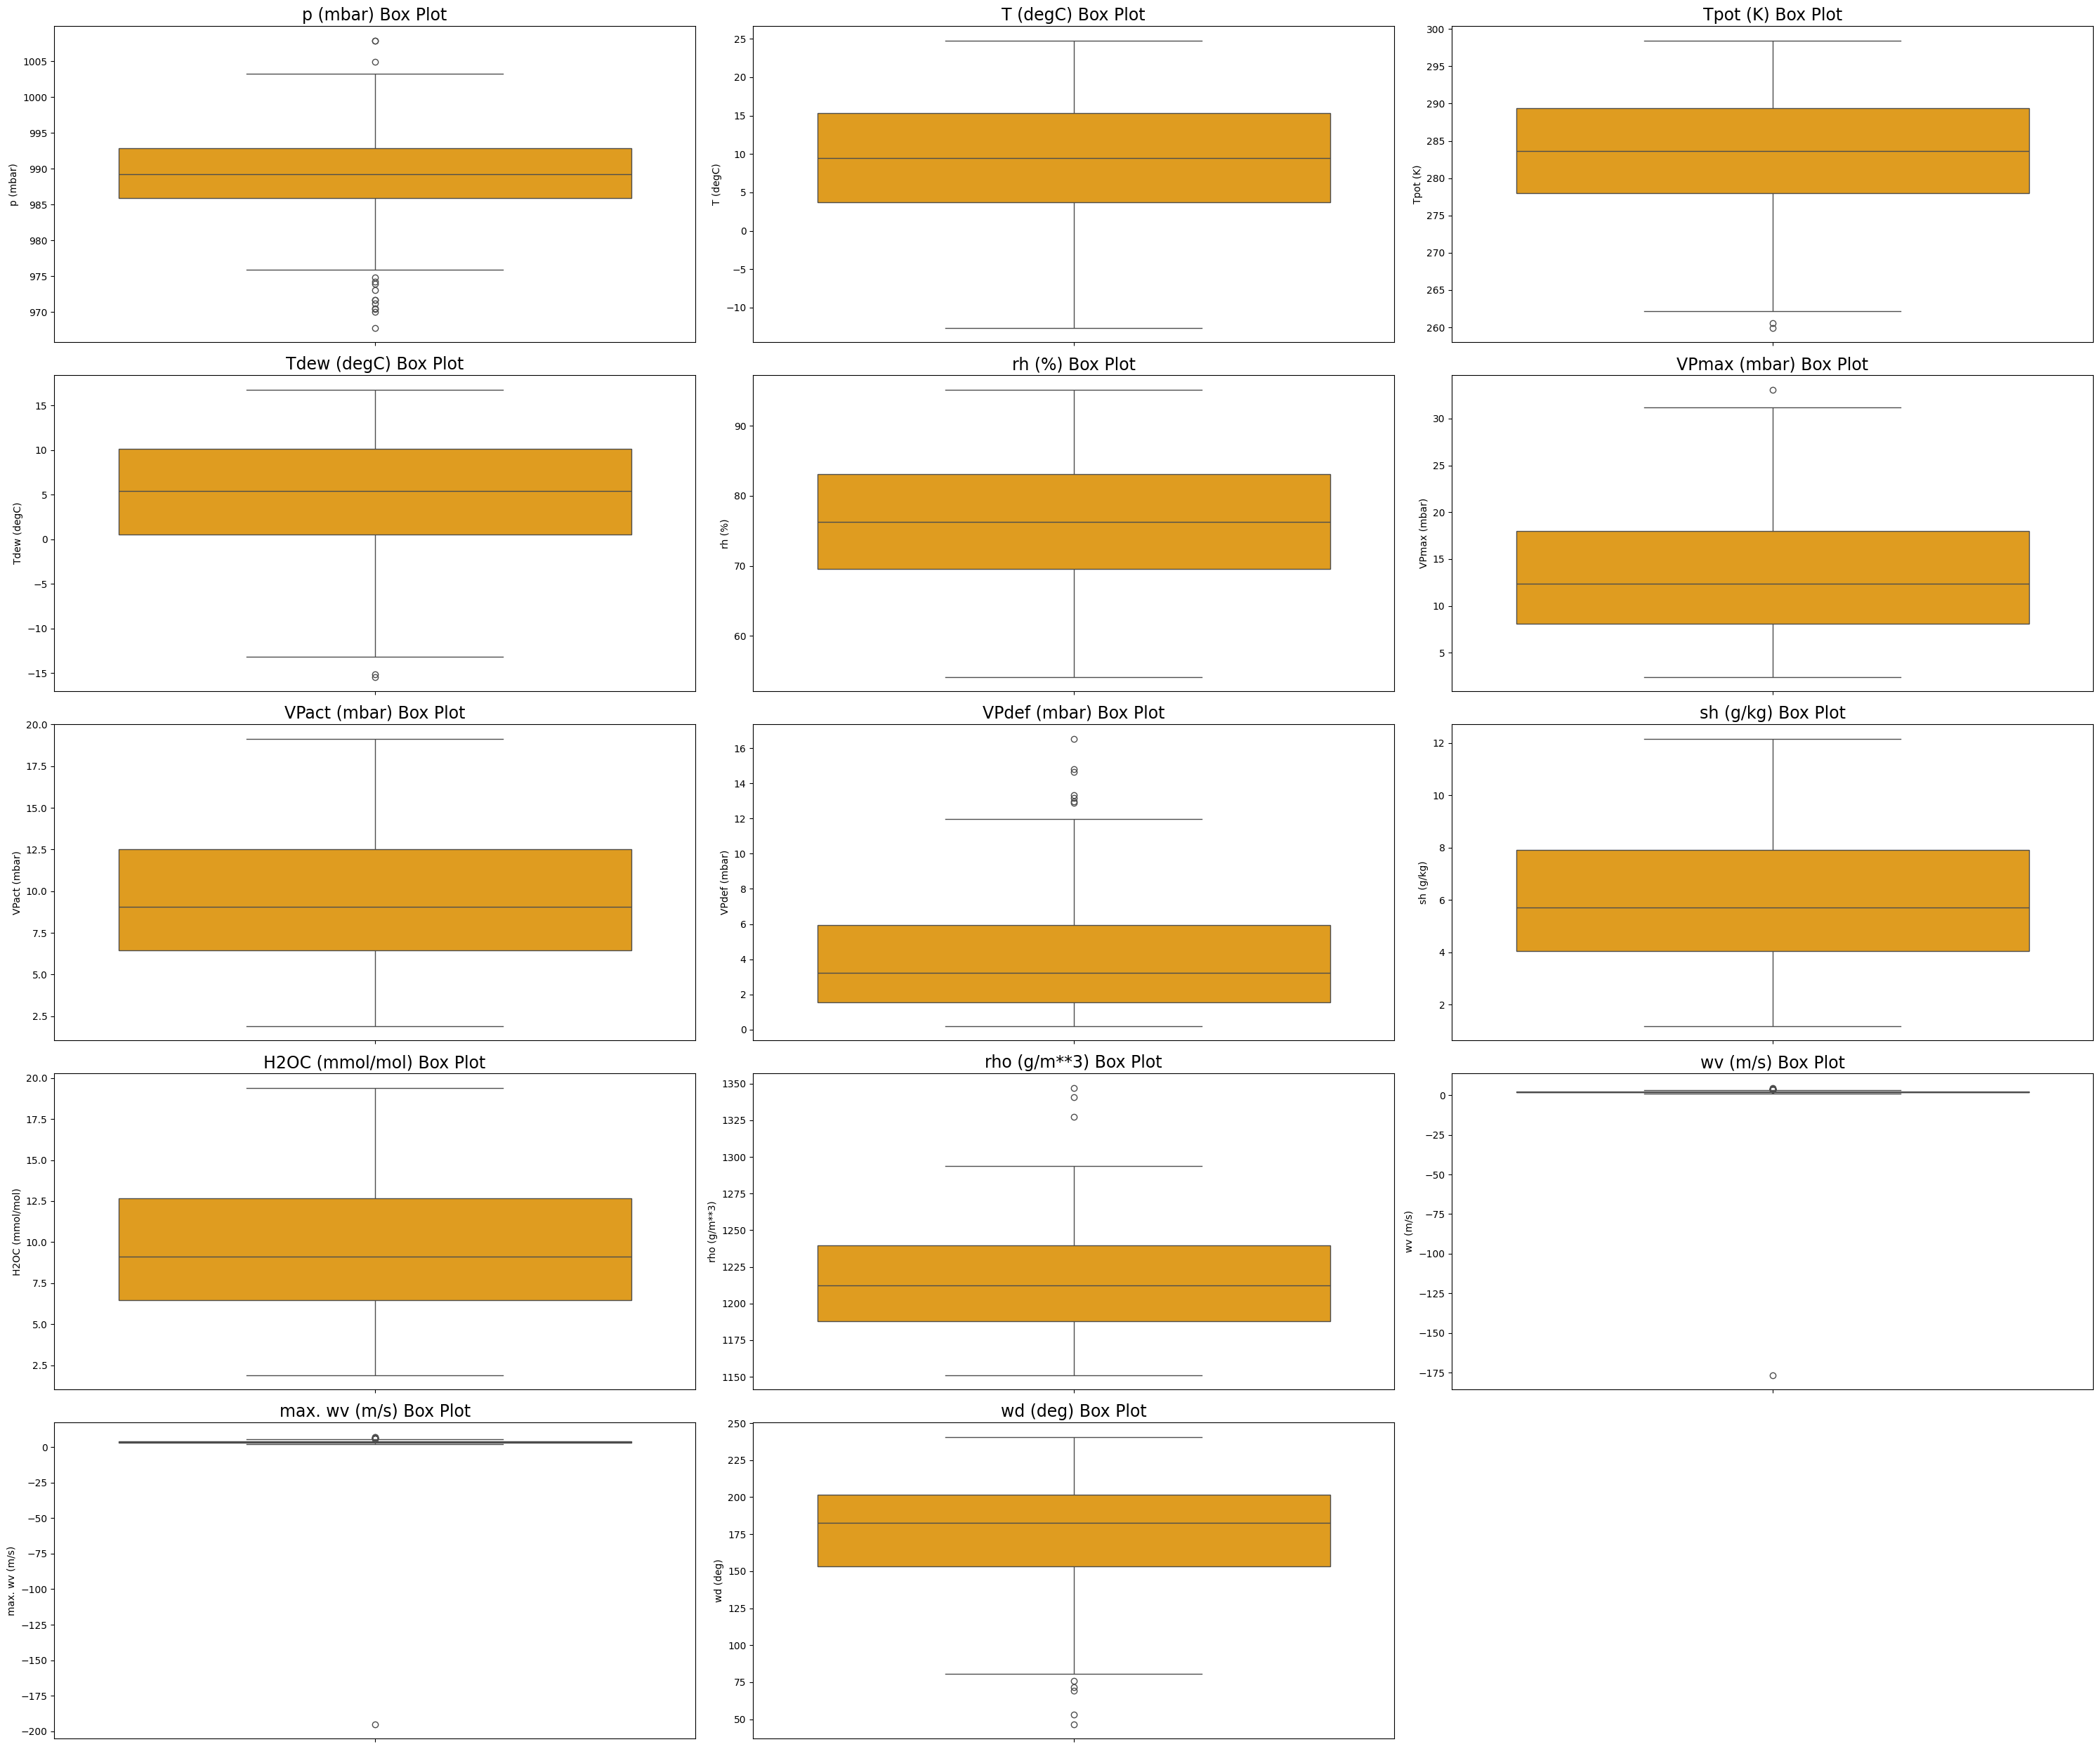

In [8]:
# CUMULATIVE BOXPLOTs
variables = w_df.columns  
n_vars = len(variables)  

n_cols = 3  
n_rows = (n_vars + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 5 * n_rows))
axes = axes.flatten()  

for i, var in enumerate(variables):
    sns.boxplot(y=w_df[var], ax=axes[i],color='Orange')
    axes[i].set_title(f'{var} Box Plot', fontsize=17)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From this we notice that we have some outliers expecially in:

* mbar

* wd deg

We want to see in detail analyze the boxplots, consider the Year in x axes.

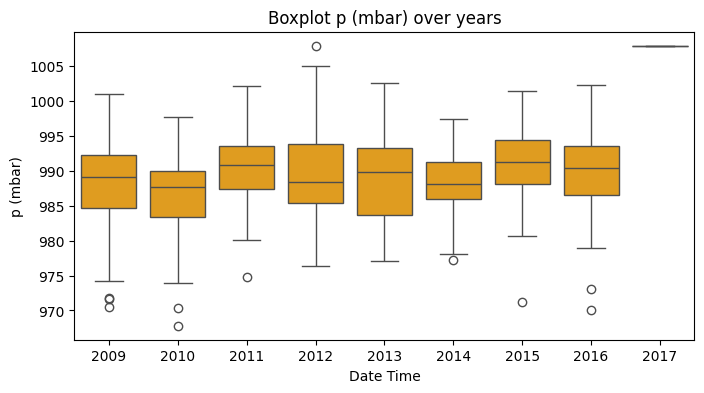

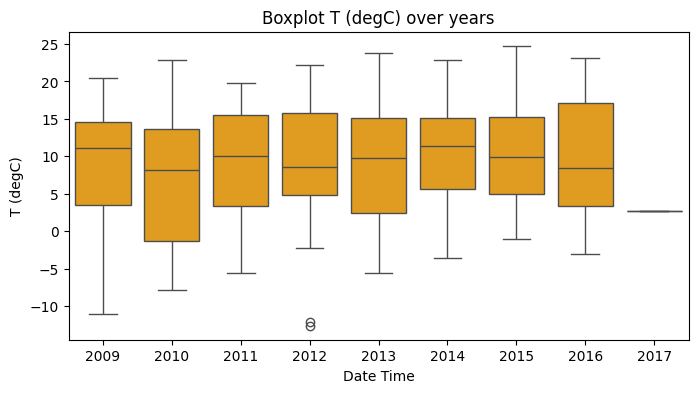

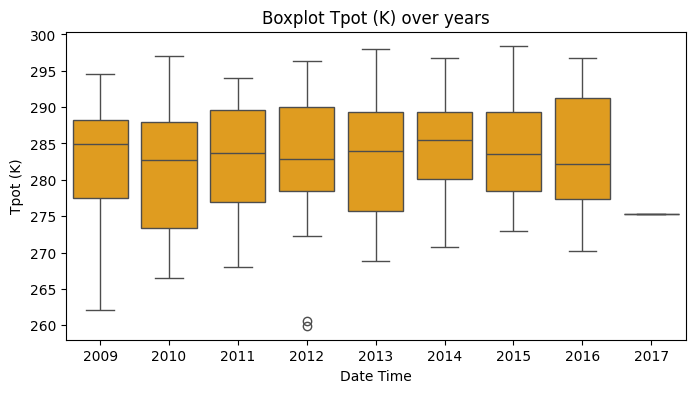

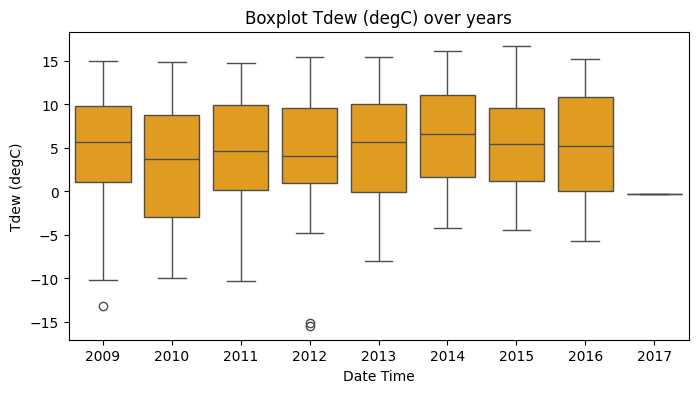

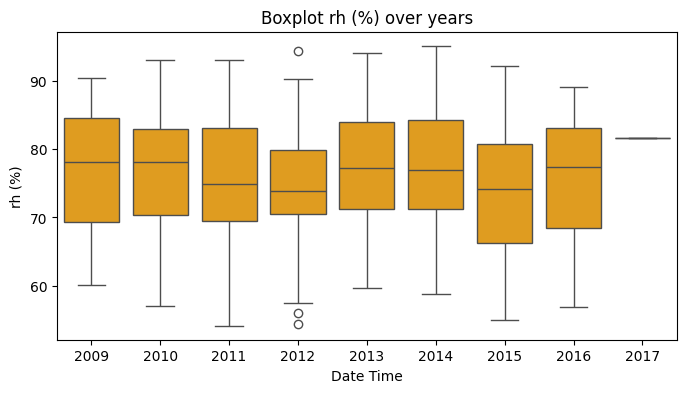

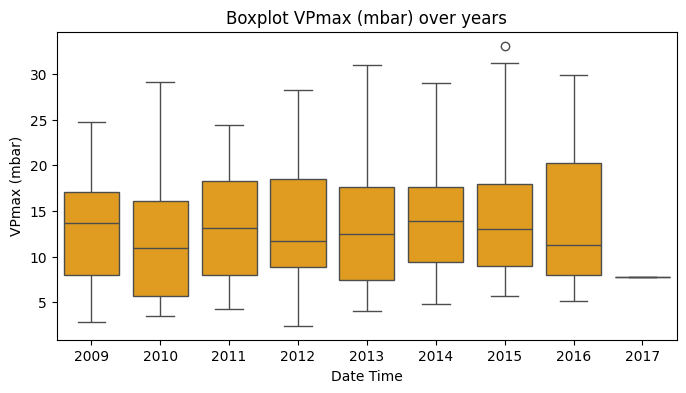

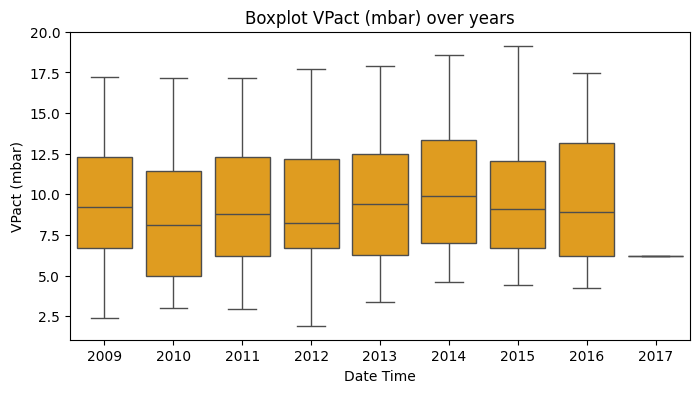

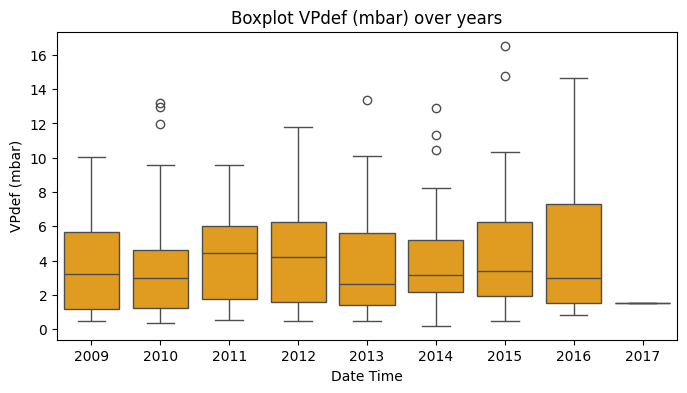

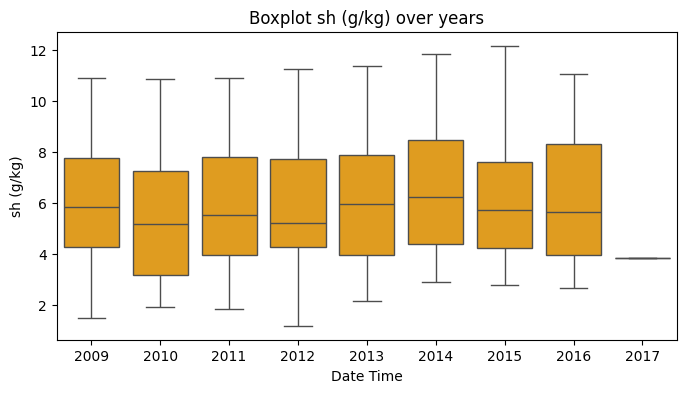

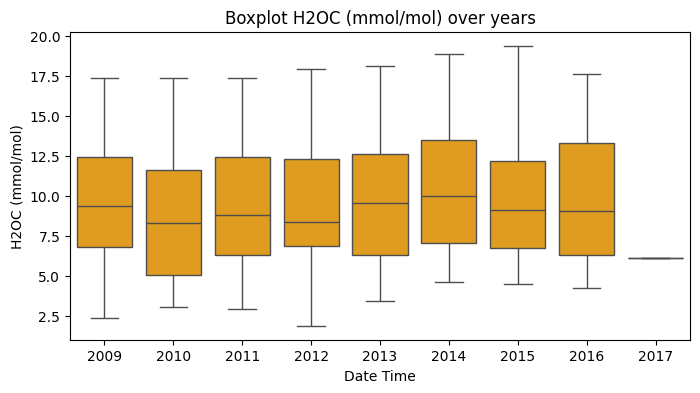

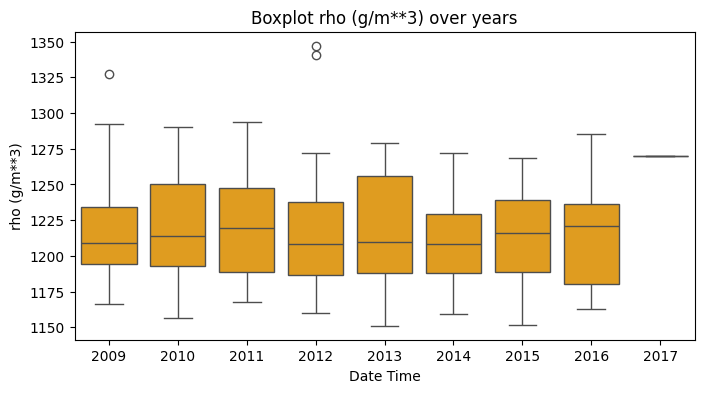

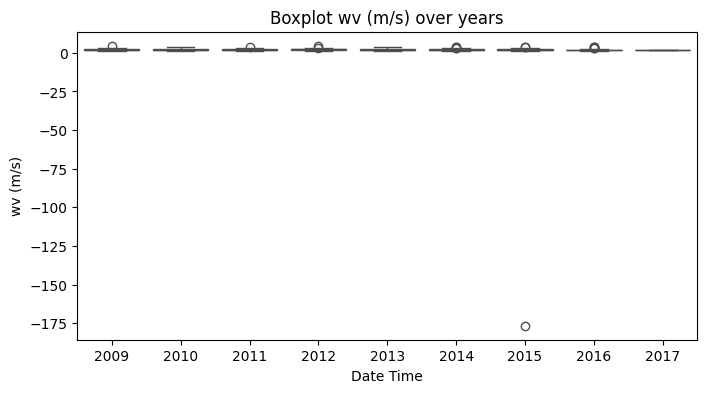

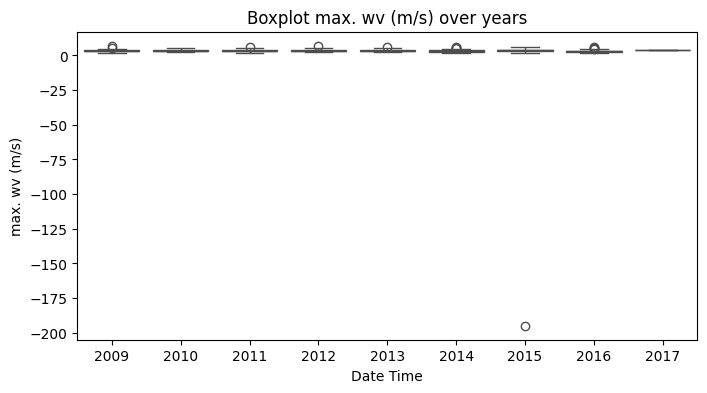

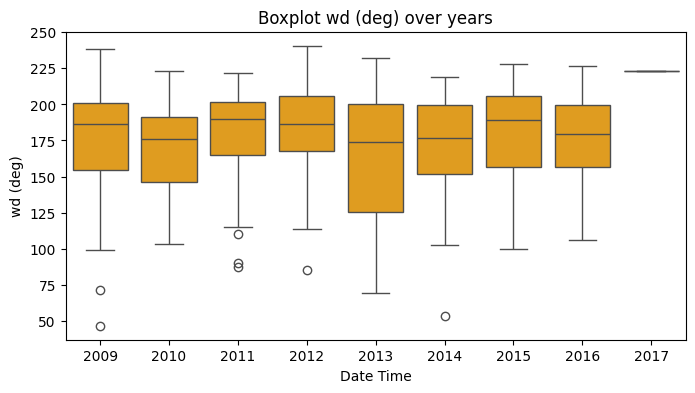

In [9]:
# we want also to see it, over years
for column in w_df.columns:
    plt.figure(figsize=(8,4))
    plt.title('Boxplot ' + column + ' over years')
    sns.boxplot(x = w_df.index.year, y = w_df[column],color='Orange')
    plt.show()

We can notice that we have a considerable numbers of outliers, but in order to verify if these are significant we use some technique in order to find them.

## IQR TECHNIQUE 


In [10]:
# We define the IQR function in order to detect outliers
def detect_outliers_iqr(df, features):
    outlier_indices = {}
    
    for feature in features:
        # Compute Q1 (25° percentile) e Q3 (75° percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definition of the upper and lower bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Outlier identification
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices[feature] = outliers.tolist()
    
    return outlier_indices

In [11]:
# easy to have all the features in a list
features=['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']

In [12]:
# now i want to create a dictionary where i have the outliers for every features
dict_out_iqr=detect_outliers_iqr(w_df,features)

In [13]:
# for example if we want to check the first variables
dict_out_iqr['T (degC)']

# this are the time index related to the outliers of this features

# FOR OUR VARIABLE OF INTEREST WE DON'T HAVE ANY OUTLIERS 
# SO WE DON'T MANAGE IT 

[]

Since for our variable of interest we don't have 'significant' outliers i decide to not manage at all, since our forecast are based only to this variable 'T deg C'

## Mean +/- 3*std methods

In [14]:
def detect_outliers_3(df,features):
    dict_out_ind= {}

    # i have to compute the mean and the std for each features
    for feature in features:
        mean_i=np.mean(w_df[feature])
        std_i=np.std(w_df[feature])

        # define the boundaries for each features
        lower_b=mean_i-3*std_i
        upper_b=mean_i+3*std_i

        # now we can detect the outliers
        outliers = df[(df[feature] < lower_b) | (df[feature] > upper_b)].index
        dict_out_ind[feature] = outliers.tolist()

    return dict_out_ind

In [15]:
dict_out_mean_3std=detect_outliers_3(w_df,features)

In [16]:
dict_out_mean_3std['T (degC)']

[]

Since for our variable of interest we don't have 'significant' outliers i decide to not manage at all, since our forecast are based only to this variable 'T deg C'

## 3) Heatmap 

check if we have correlation between variables

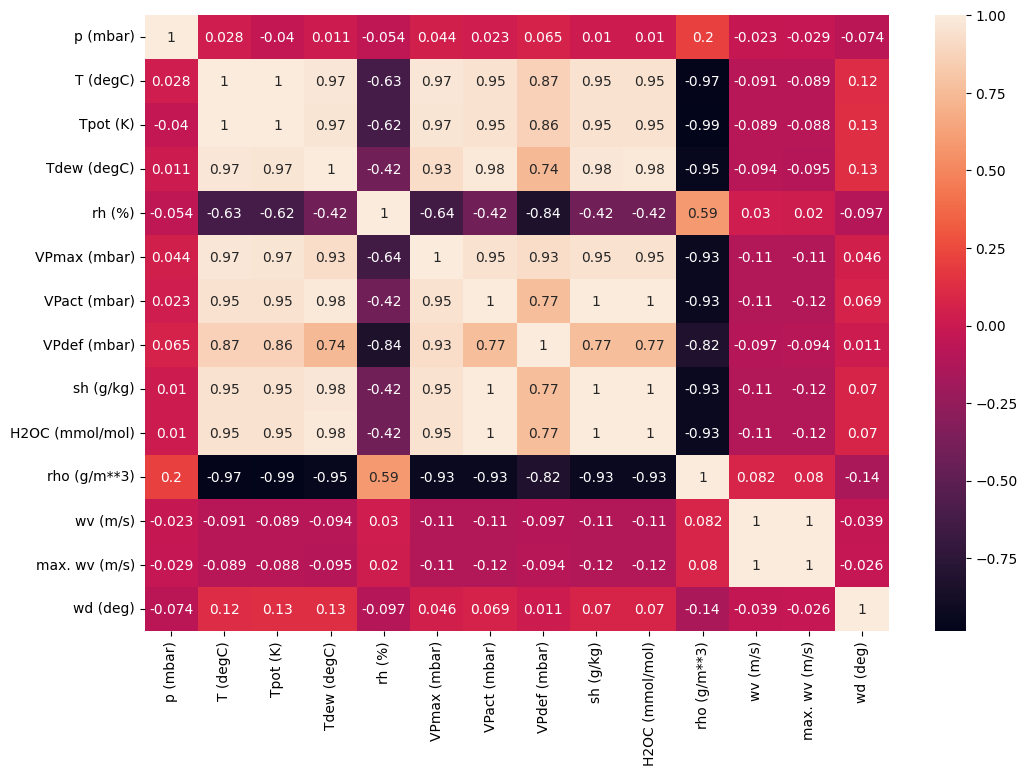

In [17]:
# now we buind an heatmap in order to understand if our feature are correlated
plt.figure(figsize=(12,8))
sns.heatmap(w_df[features].corr(),annot=True)
plt.show()

We can see from this graph that:

* Rho g/m**3 is NEGATIVE highly correlated with all the variables

* But in general we have an high correlation between variables

This could be a problem since we are not able to discriminate the effect of the single variable, since all high contribute.

But we better analyze this aspect later when we build the models.

## FREQUENCY ANALYSIS

Since we are interested only in the variable 'T degC' we consider only this for this analysis.

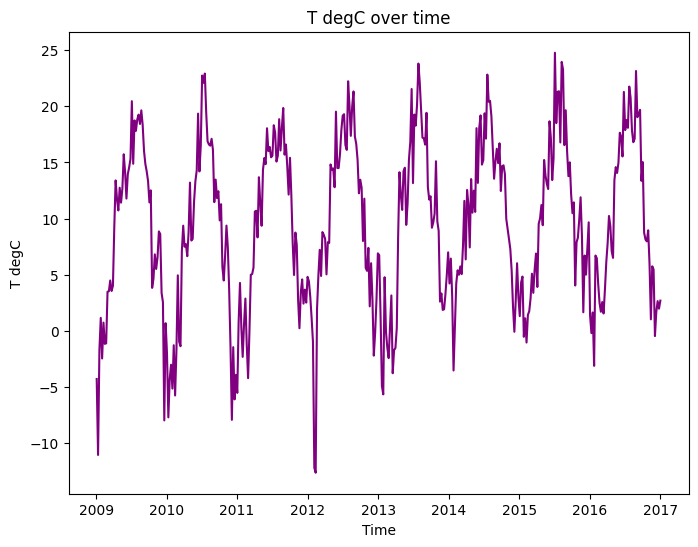

In [18]:
t_w_degC_df=w_df['T (degC)']

# we also plot it 
plt.figure(figsize=(8,6))
plt.plot(t_w_degC_df,color='Purple')
plt.xlabel('Time')
plt.ylabel('T degC')
plt.title('T degC over time')
plt.show()

   Frequency       Density  Period
0   0.019139  12174.587377   52.25


Text(0, 0.5, 'Power')

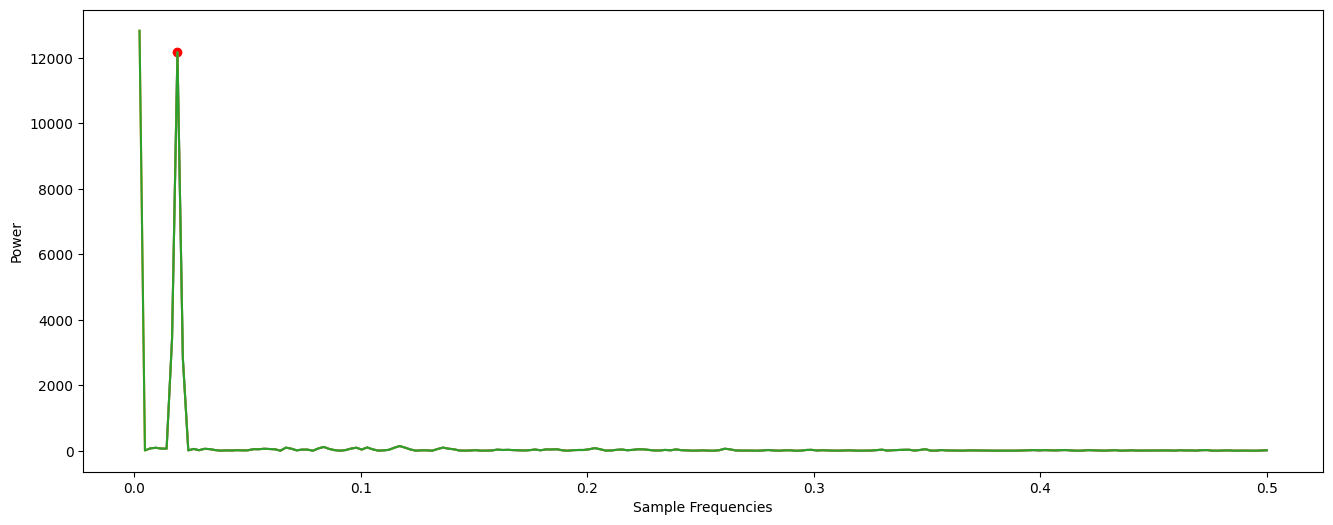

In [19]:
###Retrieve the seasonlity by using the periodogram and getting the most used frequencies.
f_per, Pxx_per = signal.periodogram(t_w_degC_df,1,detrend=None,window='hann',return_onesided=True,scaling='density')
f_per = f_per[1:]
Pxx_per = Pxx_per[1:]

#Find the peaks of the periodogram.
peaks = signal.find_peaks(Pxx_per[f_per >= 0], prominence=1000)[0]
peak_freq = f_per[peaks]
peak_dens = Pxx_per[peaks]

#Plot of the analysis transformation and of its peaks. Only the first five are interestings
fig = plt.figure(figsize=(16,6))

plt.plot(peak_freq[:5], peak_dens[:5], 'ro')
plt.plot(f_per[2:],Pxx_per[2:])

#Retrieving of the values
data = {'Frequency': peak_freq, 'Density': peak_dens, 'Period': 1/peak_freq}
df = pd.DataFrame(data)

print(df.head())
sns.lineplot(x=f_per,y=Pxx_per)
plt.plot(f_per, Pxx_per)
plt.xlabel('Sample Frequencies')
plt.ylabel('Power')

From this graph we can see that the seasonality show a peack every 52 weeks, as we can also immagine since we have weeackly data. 

**52 period** is the one that we have to take in consideration when we have to model the seasonal component in the models that we'll develop after.

## ACF and PACF


The **ACF (Autocorrelation Function)** shows the correlation between a time series and its lags, useful for detecting long-term dependencies and seasonality. 


The **PACF (Partial Autocorrelation Function)** isolates the correlation of each lag.

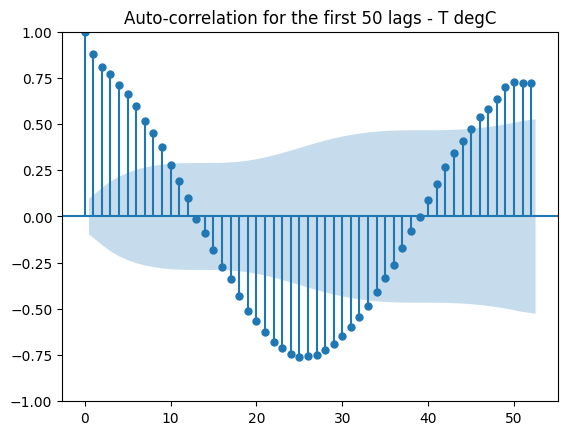

In [20]:
plot_acf(t_w_degC_df, lags=52, title='Auto-correlation for the first 50 lags - T degC')
plt.show()
#utils.plot_autocorr(t_w_degC_df, lags=150)

From this we can notice a strong seasonality in our data, since we have climate data is reasonable.

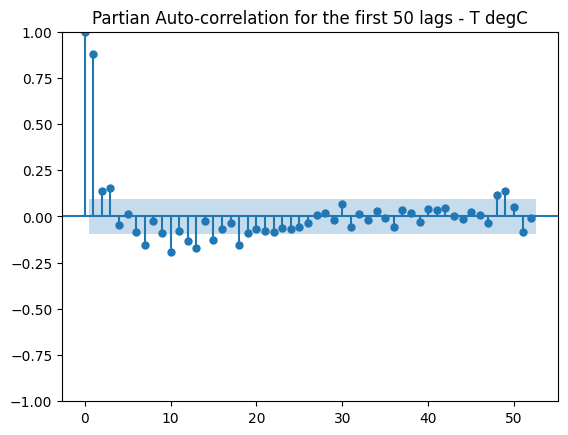

In [21]:
plot_pacf(t_w_degC_df,lags=52, title='Partian Auto-correlation for the first 50 lags - T degC' )
plt.show()

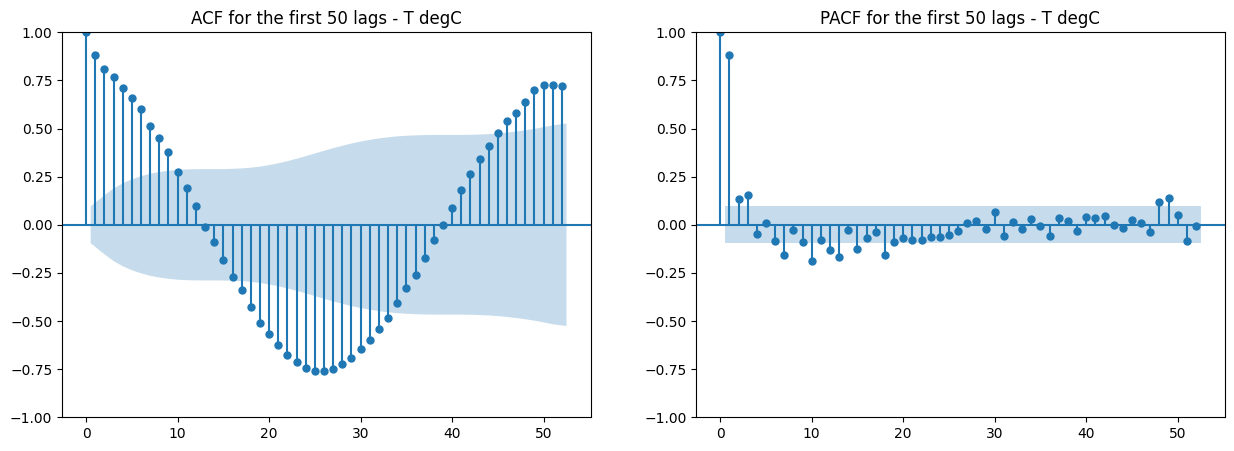

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(t_w_degC_df, lags=52, ax=ax[0], title='ACF for the first 50 lags - T degC')
plot_pacf(t_w_degC_df, lags=52, ax=ax[1], title='PACF for the first 50 lags - T degC')
plt.show()